Accuracy of Naive Bayes model: 0.9937305280972345
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    103447
         1.0       0.46      0.95      0.62       549

    accuracy                           0.99    103996
   macro avg       0.73      0.97      0.81    103996
weighted avg       1.00      0.99      0.99    103996



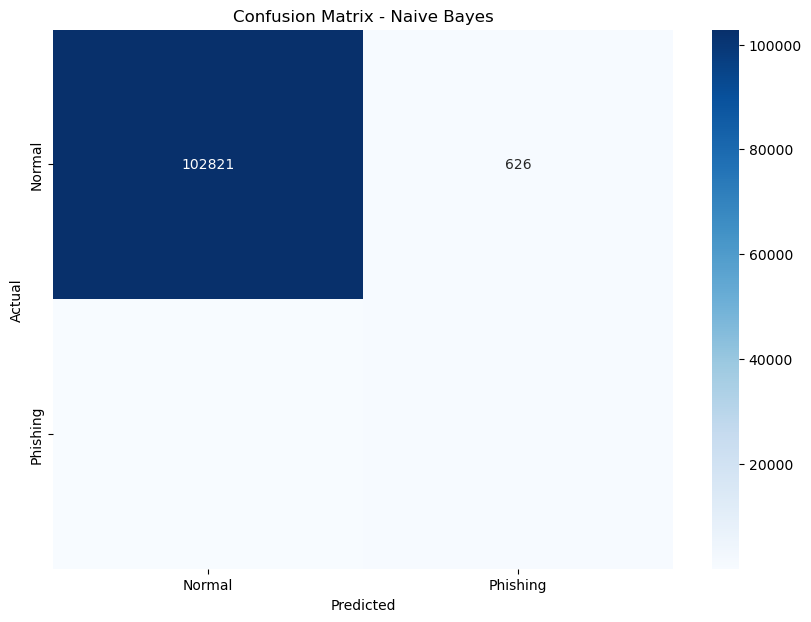

The Naive Bayes model is saved to a file: /Users/yilu/Downloads/pythonProject/Naive_Bayes_model.pkl


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # 导入朴素贝叶斯的多项式模型
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 加载合并后的数据集
combined_data_path = '/Users/yilu/Downloads/pythonProject/Combined.csv'
combined_data = pd.read_csv(combined_data_path)

# 用特定值（如平均值）填充缺失值
imputer = SimpleImputer(strategy='mean')
combined_data_imputed = imputer.fit_transform(combined_data)

# 转换为DataFrame
combined_data = pd.DataFrame(combined_data_imputed, columns=combined_data.columns)

# 划分特征和标签
X = combined_data.drop(columns=['label'])
y = combined_data['label']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练朴素贝叶斯模型
model = MultinomialNB()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes model: {accuracy}")

print("Classification report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Phishing'], yticklabels=['Normal', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# 保存训练好的模型
model_path = '/Users/yilu/Downloads/pythonProject/Naive_Bayes_model.pkl'
joblib.dump(model, model_path)
print(f"The Naive Bayes model is saved to a file: {model_path}")